<a href="https://colab.research.google.com/github/rajatrai16921/Remaining-User-Life-Prediction-Using-NASA-Milling-Dataset/blob/main/RUL_Prediction_milling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
raw_data = pd.read_csv('mill.csv')
raw_data

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,16,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
164,16,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


In [3]:
# Making an array which contains EOL of all the CASES
EOL=[]
for sl_no in raw_data['case']:
        EOL.append( ((raw_data[raw_data['case'] == sl_no]['run']).values)[-1])

In [4]:
np.shape(EOL)

(167,)

In [5]:
# Append the "EOL" column
raw_data["EOL"]=EOL
raw_data

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,EOL
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760,17
1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487,17
2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980,17
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771,17
4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,16,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253,6
163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771,6
164,16,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798,6
165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746,6


# **Classification Problem Formulation**
The challange of this competetion was to predict the Remaining Useful Life  by using the given sensor's data and operational conditions.

But in this project, we ll try to simplify that by converting it to a Classification Problem. Where, the classes/labels will of 3 types, i.e. **Good Condition**, **Moderate Condition** and **Warning Condition**.



>**labels corresponding to each conditions**
1.   Good Condition - 0
2.   Moderate Condition - 1
3.   Warning Condition - 2

---

# **Defining the labels**
Here we will define the engine's condition with **Life Ratio (LR)**, which is the ratio between **Current Cycle** and the **End cycle/ End of Life(EOL)**. *If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.*

1. if LR <= 0.6 - Good Condition
2. if 0.6 < LR <= 0.8 - Moderate Condition
3. if 0.8 < LR - Warning Condition

In [6]:
# Calculate "LR"
raw_data["LR"] = raw_data['run'].div(raw_data["EOL"])
raw_data

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,EOL,LR
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760,17,0.058824
1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487,17,0.117647
2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980,17,0.176471
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771,17,0.235294
4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474,17,0.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,16,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253,6,0.333333
163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771,6,0.500000
164,16,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798,6,0.666667
165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746,6,0.833333


In [7]:
# Drop ID and EOL
raw_data=raw_data.drop(columns=['case','EOL'])

In [8]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,labels
0,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760,0
1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487,0
2,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980,0
3,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771,0
4,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253,0
163,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771,0
164,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798,1
165,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746,2


In [9]:
x = raw_data.iloc[:,0:-1]
y = raw_data.iloc[:,-1]

In [10]:
x

,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...
162,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
163,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
164,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
165,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


In [11]:
x['VB']=x['VB'].fillna(x['VB'].mean())

In [12]:
x

,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,0.000000,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,0.337603,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,0.337603,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,0.110000,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,0.337603,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...
162,2,0.337603,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
163,3,0.240000,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
164,4,0.337603,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
165,5,0.400000,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    1
165    2
166    2
Name: labels, Length: 167, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

# **Training a Random Forest model**

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

# **Performance on Validation set**

0.9411764705882353

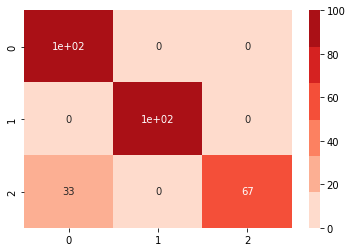

In [16]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

In [20]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

# **Performance on Training set**

1.0

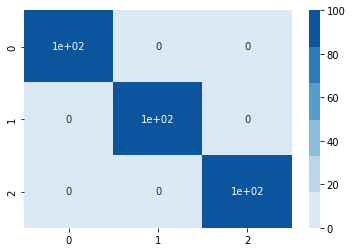

In [17]:
y_pred_RF = RF.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_train, y_pred_RF) # or RF.score(X_train,y_train)

In [18]:
y_pred_RF

array([0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0])

# **Randomized Search with cross validation for Hyperparameter optimization**
As the previous model clearly overfits the training data, we need to do some hyperparameter tuning. For that we will do a random search with 3 fold cross validation

In [ ]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[200, 400, 300]
# Maximum number of levels in tree
max_depth= [10, 20, 30]
# Max number of samples given to each tree 
max_samples= [0.2,0.3,0.4 ]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [ ]:
rf_random.best_params_

{'max_depth': 30, 'max_samples': 0.3, 'n_estimators': 200}

In [ ]:
rf_random.best_score_

0.8066666666666666

0.8823529411764706

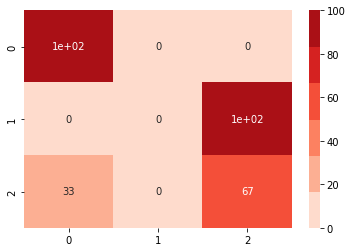

In [ ]:
RF_randSer = RandomForestClassifier(n_estimators=200,max_samples=0.3,max_depth= 30)
RF_randSer.fit(X_train, y_train)
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

0.9533333333333334

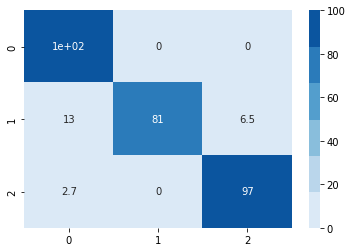

In [ ]:
RF_randSert = RandomForestClassifier(n_estimators=200,max_samples=0.3,max_depth= 30)
RF_randSert.fit(X_train, y_train)
y_pred_RFt = RF_randSer.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RFt, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_train, y_pred_RFt) # or RF.score(X_train,y_train)

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initializing the Model with arbitary parameters
regressor = RandomForestRegressor()

# Training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()